# DT Assignment2_투빅스 14기 이혜린

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

df = pd.read_csv('https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
df.drop("RID",axis=1, inplace = True) #RID는 그냥 Index라서 삭제

In [2]:
df

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_aged,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [3]:
def getEntropy(df, feature) :
    
    entropy = sum(df[feature]=='yes') / len(df) * np.log2(sum(df[feature]=='yes') / len(df)) + sum(df[feature]=='no') / len(df) * np.log2(sum(df[feature]=='no') / len(df))
    
    if str(entropy) == 'nan': #로그 계산 시 nan 값이 나올 때가 있기 때문에 if 함수 적용
        entropy = 0
        
    return -entropy

In [4]:
getEntropy(df, "class_buys_computer")

0.9402859586706311

In [5]:
def getGainA(df, feature) :
    info_D = getEntropy(df, feature) # 목표변수에 대한 Entropy 를 구하기
    columns = list(df.loc[:, df.columns != feature]) # 목표변수(feature)를 제외한 나머지 변수들의 변수명을 리스트 형태로 저장
    
    result = []
    
    for i in range(len(columns)):
        uni = list(df[columns[i]].unique())
        entropy = 0
        
        for j in range(len(uni)):
            df_j = df[df[columns[i]]==uni[j]]
            entropy -= len(df_j)/len(df) * getEntropy(df_j,feature)
        g_s_en = info_D + entropy 
        result.append([columns[i], g_s_en]) 
    
    return(result)

In [6]:
getGainA(df, "class_buys_computer")

[['age', 0.24674981977443933],
 ['income', 0.02922256565895487],
 ['student', 0.15183550136234159],
 ['credit_rating', 0.04812703040826949]]

## + scikit-learn을 이용한 Decision Tree (Entropy) 실습

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [8]:
x = df.drop(['class_buys_computer'], axis=1)
y = df['class_buys_computer']

In [9]:
# 범주형 변수를 숫자형 변수로 전환 

encoder = LabelEncoder()
X_train = pd.DataFrame(np.zeros((x.shape[0],x.shape[1])))

for i in range(x.shape[1]):
    encoder.fit(x.iloc[:,i])
    X_train.iloc[:,i] = encoder.transform(x.iloc[:,i])

In [10]:
X_train.columns = ['age', 'income', 'student', 'credit_rating']
X_train

,age,income,student,credit_rating
0,2,0,0,1
1,2,0,0,0
2,0,0,0,1
3,1,2,0,1
4,1,1,1,1
5,1,1,1,0
6,0,1,1,0
7,2,2,0,1
8,2,1,1,1
9,1,2,1,1


In [11]:
y_train = pd.get_dummies(y, drop_first=True)
y_train.columns = ['class_buys_computer']
y_train # 0 : no, 1: yes

,class_buys_computer
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


Variable | Explanation
:-|:-
age | 0 : middled_age, 1 : senior, 2 : youth
income | 0 : high, 1 : low, 2 : medium
student | 0 : no, 1 : yes
credit_rating | excellent : 0, fair : 1
class_buys_computer | 0 : no, 1 : yes

In [12]:
dt_model_entropy = DecisionTreeClassifier(criterion='entropy') # entropy를 사용한 decision tree

In [13]:
dt_model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
X_new = [[1, 0, 0, 0]] # age = senior, income=high, student=no, credit_rating=excellent

In [15]:
dt_model_entropy.predict(X_new)

array([0], dtype=uint8)

age=senior, income=high, student=no, credit_rating=excellent인 사람은 computer를 사지 않는다.

###  Decision Tree 시각화

[]

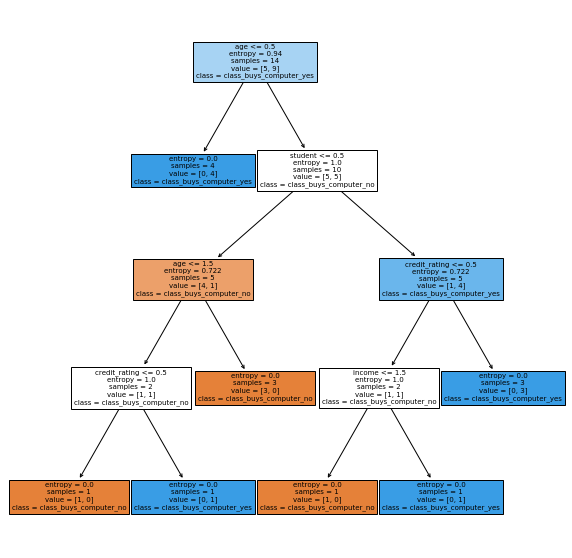

In [16]:
from sklearn import tree

fn=['age', 'income', 'student', 'credit_rating']
cn=['class_buys_computer_no', 'class_buys_computer_yes']

plt.figure(figsize=(10,10))
tree.plot_tree(dt_model_entropy, feature_names=fn, class_names=cn, filled=True)
plt.plot()